In [1]:
import numpy as np # linear algebra
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [9]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from joblib import dump


In [12]:
# Create and train the models
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine Classifier': SVC(),
    'Gaussian Naive Bayes Classifier': GaussianNB()
}





In [13]:
best_accuracy = 0.0
best_model = None

for name, clf in classifiers.items():
    clf.fit(X_train_trf, y_train)
    y_pred = clf.predict(X_test_trf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf


Logistic Regression Accuracy: 0.804
Decision Tree Classifier Accuracy: 0.793
Random Forest Classifier Accuracy: 0.8565
Support Vector Machine Classifier Accuracy: 0.8465
Gaussian Naive Bayes Classifier Accuracy: 0.819


the best model with the highest accuracy score is RandomForestClasssifer with an accuracy of 0.8655, performing more than other models and infact more than the deep learning ANN



The model with the highest accuracy is saved  to a joblib file 

In [14]:
random_model = RandomForestClassifier()
random_model.fit(X_train_trf,y_train)

RandomForestClassifier()

In [15]:
# Evaluate the model

y_pred = random_model.predict(X_test_trf)
evaluate_random_model = accuracy_score(y_test,y_pred)
print("RandomForestClassifer Score: ", evaluate_random_model)

RandomForestClassifer Score:  0.8545


In [16]:
dump(best_model, 'rfc_credit_card.joblib')

['rfc_credit_card.joblib']

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1588
           1       0.77      0.42      0.54       412

    accuracy                           0.85      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.85      0.84      2000



Feature Importance

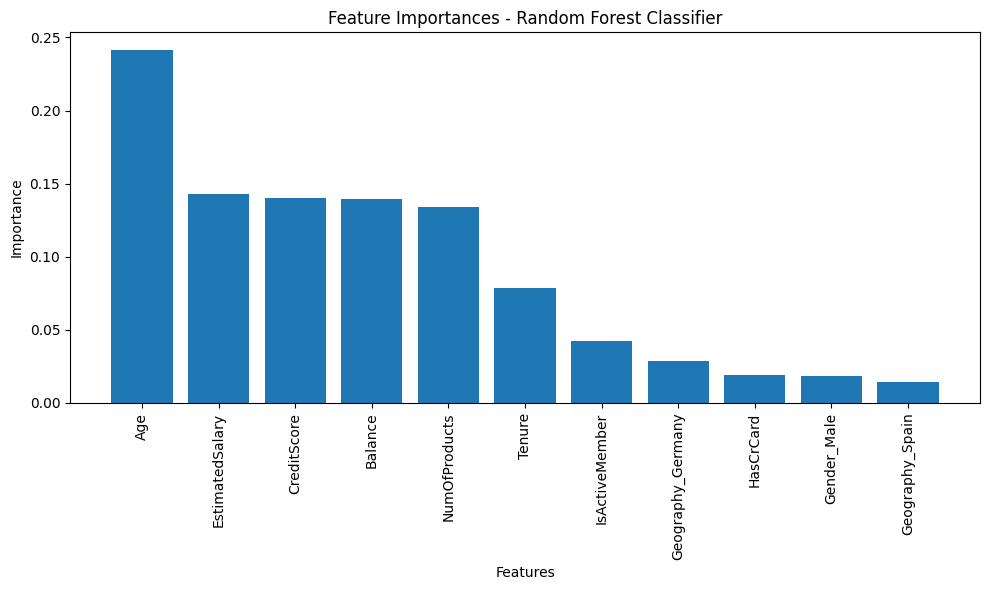

In [19]:
# Get the feature importances
import matplotlib.pyplot as plt

importances = random_model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest Classifier")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()